In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import *
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

### Create Database Engine

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

### Output Table Names

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### Output Columns in Both Tables

In [4]:
# We can view all of the classes that automap found
inspector.get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
inspector.get_columns("station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# SQL Query 1: Retrieve Precipiation Data

In [6]:
query_m_1 = """
                select
                    date as Date,
                    id as Measurement_ID,
                    station as Station_ID,
                    prcp as Precipitation,
                    tobs as Temperature
                from 
                    measurement
            """

# Read SQL Query 1 into DataFrame

In [7]:
conn = engine.connect()
measurement_df = pd.read_sql(query_m_1, conn)
conn.close()

In [8]:
measurement_df = pd.DataFrame(measurement_df)
# Convert Date Column to Timestamp
measurement_df['Date'] = pd.to_datetime(measurement_df['Date'])
# Sort Rows by Date
measurement_df.sort_values('Date', ascending=True, inplace=True)
#Set Date as Index
m_df = measurement_df
m_df.set_index('Date', inplace=True)

In [9]:
measurement_df.head()

,Measurement_ID,Station_ID,Precipitation,Temperature
Date,,,,
2010-01-01,1,USC00519397,0.08,65.0
2010-01-01,9008,USC00518838,0.21,72.0
2010-01-01,9519,USC00519523,0.15,75.0
2010-01-01,12188,USC00519281,0.15,70.0
2010-01-01,14960,USC00511918,0.05,66.0


### Filter For Last 12 Months

In [10]:
start_date = m_df.index.max()
end_date = m_df.index.max() - relativedelta(months=12)
mask = (m_df.index > end_date) & (m_df.index <= start_date)
last12_df = m_df.loc[mask]

### Identify Null Values & Replace with '0'

In [11]:
last12_df.isnull().sum()

Measurement_ID      0
Station_ID          0
Precipitation     208
Temperature         0
dtype: int64

In [12]:
last12_df['Precipitation'].fillna(0, inplace=True)

/home/bdr/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Summary Statistics

In [13]:
last12_df.describe()

,Measurement_ID,Precipitation,Temperature
count,2223.000000,2223.000000,2223.000000
mean,10159.397211,0.159951,74.578947
std,5604.268703,0.441220,4.612232
min,2365.000000,0.000000,58.000000
25%,5287.500000,0.000000,71.000000
50%,8931.000000,0.010000,75.000000
75%,14751.500000,0.110000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Climate Analysis

### Plot Precipitation

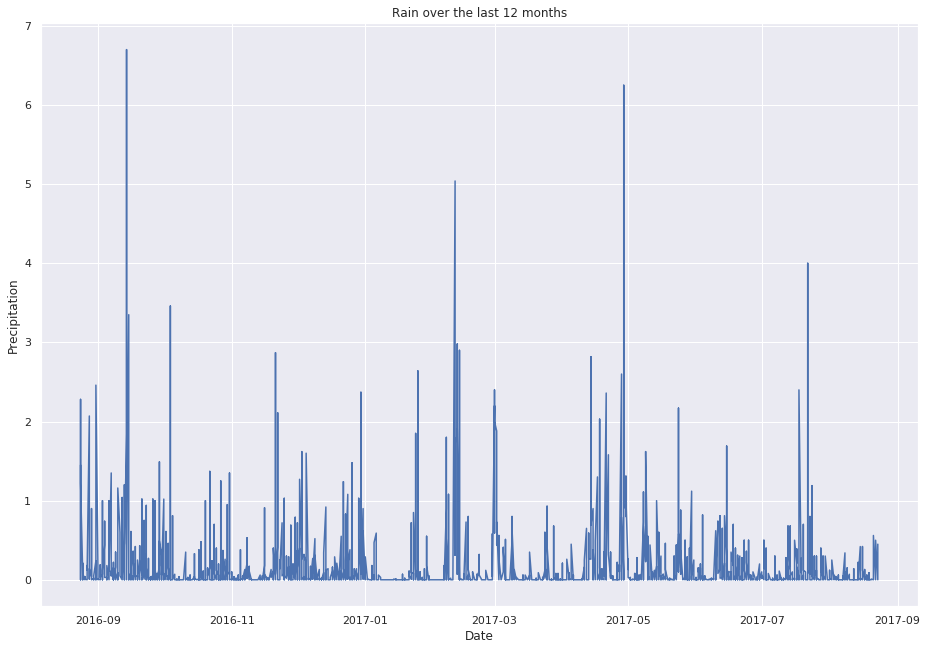

In [14]:
sns.set()
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.plot(last12_df.index, last12_df.Precipitation)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Rain over the last 12 months")
plt.show()

# SQL Query 2: Retrieve Precipiation Data & Station Details

In [15]:
query_s_1 = """
                select 
                    m.id as measure_ID,
                    m.date as Date,
                    m.prcp as Precipitation,
                    m.tobs as Temperature,
                    s.id as station_ID,
                    m.station,
                    s.name as station_Name,
                    s.latitude,
                    s.longitude,
                    s.elevation
                from
                    "measurement" m
                    join "station" s on m.station = s.station
            """

# Read SQL Query 2 into DataFrame

### Stations DataFrame

In [16]:
conn = engine.connect()
station_df = pd.read_sql(query_s_1, conn)
conn.close()

In [17]:
# Convert Date Column to Timestamp
station_df['Date'] = pd.to_datetime(station_df['Date'])
# Sort Rows by Date
station_df.sort_values('Date', ascending=True, inplace=True)
#Set Date as Index
s_df = station_df
s_df.set_index('Date', inplace=True)

In [18]:
s_df.head()

,measure_ID,Precipitation,Temperature,station_ID,station,station_Name,latitude,longitude,elevation
Date,,,,,,,,,
2010-01-01,1,0.08,65.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2010-01-01,9008,0.21,72.0,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
2010-01-01,9519,0.15,75.0,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2010-01-01,12188,0.15,70.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2010-01-01,14960,0.05,66.0,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9


### Fill Null Values

In [19]:
s_df['Precipitation'].fillna(0, inplace=True)

In [20]:
s_df.isnull().sum()

measure_ID       0
Precipitation    0
Temperature      0
station_ID       0
station          0
station_Name     0
latitude         0
longitude        0
elevation        0
dtype: int64

# Identify the Number of Stations

In [21]:
num_of_stations = len(s_df['station'].unique())
num_of_stations

9

# List Stations by Number of Measurements

In [22]:
active_stations = s_df.groupby(['station_Name'])['measure_ID'].count()
active_stations = pd.DataFrame(active_stations)
active_stations.rename(columns={'measure_ID':'Number of Measurements'}, inplace=True)
active_stations.sort_values('Number of Measurements', ascending=False, inplace=True)
active_stations

,Number of Measurements
station_Name,
"WAIHEE 837.5, HI US",2772
"WAIKIKI 717.2, HI US",2724
"KANEOHE 838.1, HI US",2709
"WAIMANALO EXPERIMENTAL FARM, HI US",2669
"MANOA LYON ARBO 785.2, HI US",2612
"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
"HONOLULU OBSERVATORY 702.2, HI US",1979
"PEARL CITY, HI US",1372
"UPPER WAHIAWA 874.3, HI US",511


# Most Active Station

In [23]:
ac_mask = active_stations['Number of Measurements'] == active_stations['Number of Measurements'].max()

In [24]:
top_station = active_stations.loc[ac_mask]
top_station.index[0]

'WAIHEE 837.5, HI US'

# Filter for last 12 Months

In [25]:
s_start_date = s_df.index.max()
s_end_date = s_df.index.max() - relativedelta(months=12)
s_mask = (s_df.index > end_date) & (s_df.index <= start_date)
s_last12_df = s_df.loc[s_mask]
s_last12_df.head()

,measure_ID,Precipitation,Temperature,station_ID,station,station_Name,latitude,longitude,elevation
Date,,,,,,,,,
2016-08-24,19203,1.45,74.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2016-08-24,2365,0.08,79.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2016-08-24,5092,2.15,76.0,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2016-08-24,14609,2.15,77.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2016-08-24,8826,0.00,78.0,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


# Filter for Most Active Station

In [26]:
mas_mask = s_last12_df['station_Name'] == 'WAIHEE 837.5, HI US'
mas_df = s_last12_df.loc[mas_mask]

### Lowest Temperature

In [27]:
mas_df.Temperature.min()

59.0

### Highest Temperature

In [28]:
mas_df.Temperature.max()

83.0

### Average Temperature

In [29]:
mas_df.Temperature.mean()

73.0968660968661

### Plot Histogram

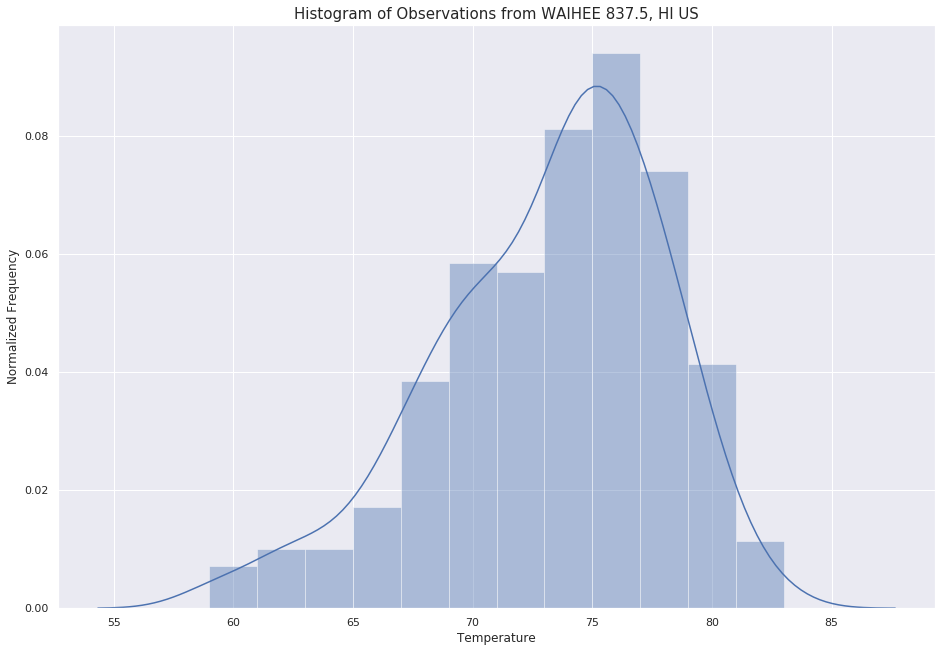

In [30]:
fig = plt.gcf()
fig.set_size_inches(14, 10)
sns.set()

#sns.set(color_codes=True)
sns.distplot(mas_df.Temperature, hist=True, bins=12, norm_hist=False)
plt.xlabel("Temperature", fontsize= 12)
plt.ylabel("Normalized Frequency", fontsize= 12)
plt.title("Histogram of Observations from WAIHEE 837.5, HI US", fontsize= 15)
plt.savefig('Histogram of Observations from WAIHEE 837.5, HI US', format="jpeg", dpi=300)
plt.show()